In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
train = pd.read_csv('Google_Stock_Price_Train.csv')

In [23]:
train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [24]:
train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [25]:
train['Close'] = pd.to_numeric(train['Close'].str.replace(',' , '') , errors = 'coerce')
train['Close'].dtype

dtype('float64')

In [26]:
test = pd.read_csv('Google_Stock_Price_Test.csv')

In [27]:
test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [28]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

train_data = mms.fit_transform(train['Close'].values.reshape(-1,1))
test_data = mms.fit_transform(test['Close'].values.reshape(-1,1))

In [29]:
def create_sequences(data , time_steps = 6):
    x = []
    y = []
    for i in range(len(data)-time_steps):
        x.append(data[i:i+time_steps , 0])
        y.append(data[i+time_steps , 0])
    return np.array(x) , np.array(y)

In [30]:
x_train , y_train = create_sequences(train_data)
x_test , y_test = create_sequences(test_data)

In [31]:
from keras.models import Sequential
from keras.layers import LSTM ,Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = Sequential()
model.add(LSTM(units = 50 , return_sequences= True , input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(units= 50))
model.add(Dense(units = 1))

model.compile(optimizer  = 'adam' , loss = 'mean_squared_error')
model.summary()
          

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(x_train , y_train , epochs = 8, batch_size = 4)

Epoch 1/8
376/376 [==============================] - 14s 13ms/step - loss: 0.0077
Epoch 2/8
376/376 [==============================] - 5s 13ms/step - loss: 0.0024
Epoch 3/8
376/376 [==============================] - 5s 13ms/step - loss: 0.0024
Epoch 4/8
376/376 [==============================] - 5s 14ms/step - loss: 0.0021
Epoch 5/8
376/376 [==============================] - 5s 13ms/step - loss: 0.0018
Epoch 6/8
376/376 [==============================] - 5s 14ms/step - loss: 0.0016
Epoch 7/8
376/376 [==============================] - 5s 13ms/step - loss: 0.0013
Epoch 8/8
376/376 [==============================] - 5s 13ms/step - loss: 0.0012


In [33]:
loss = model.evaluate(x_test , y_test)

4/4 [==============================] - 2s 9ms/step - loss: 0.0170


In [34]:
y_pred = model.predict(x_test)
y_pred = mms.inverse_transform(y_pred)
y_test = mms.inverse_transform(y_test.reshape(-1,1))

4/4 [==============================] - 2s 7ms/step


In [35]:
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
mae


16.69793242722557

In [36]:
mse

517.2515053269891

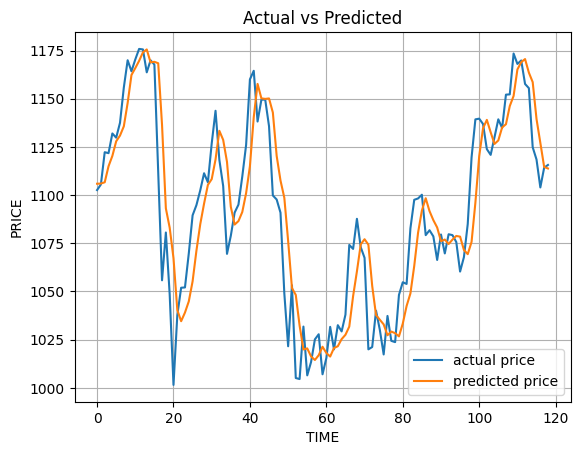

In [37]:
plt.plot(y_test , label = 'actual price')
plt.plot(y_pred , label = 'predicted price')
plt.title('Actual vs Predicted')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.grid(True)
plt.show()